In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
matplotlib.__version__

'3.4.3'

In [3]:
DOE_NAME = "doe1"
factors = ["max_time", "batch_size", "seq_len", "seq_est_len",  "est_type"]
response = "FIT"

In [4]:
df_res = pd.read_csv(DOE_NAME + "_res.csv")  # doe1_res.csv

In [5]:
df_res.columns

Index(['experiment_id', 'lr', 'epochs', 'max_time', 'batch_size', 'seq_len',
       'seq_est_len', 'est_type', 'est_hidden_size', 'seed', 'FIT'],
      dtype='object')

In [6]:
df_res['est_type'] = df_res['est_type'].replace(['RAND', 'ZERO', 'LSTM', 'FF'], ['R', 'Z', 'L', 'F'])

In [7]:
df_res['est_type']

0      Z
1      F
2      L
3      R
4      R
      ..
427    Z
428    Z
429    L
430    Z
431    Z
Name: est_type, Length: 432, dtype: object

In [8]:
df_res.sort_values(by=response, inplace=True, ascending=False)
df_res["FIT"] = df_res["FIT"].fillna(np.min(df_res["FIT"])-0.1)

In [9]:
for factor in factors:
    df_res[factor] = df_res[factor].astype("category")

In [10]:
df_res.head(20)

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_type,est_hidden_size,seed,FIT
22,297,0.001,10000,1800,128,256,40,F,30,294,95.256770
41,55,0.001,10000,1800,32,64,10,F,10,425,95.133889
268,35,0.001,10000,1800,1024,512,40,L,10,220,94.948192
59,283,0.001,10000,1800,32,512,10,F,30,19,94.886070
156,271,0.001,10000,1800,32,64,10,F,30,152,94.872825
176,285,0.001,10000,1800,128,512,10,F,30,226,94.833121
397,3,0.001,10000,1800,128,64,10,L,10,199,94.816719
165,275,0.001,10000,1800,1024,64,10,F,30,339,94.791857
149,33,0.001,10000,1800,128,512,40,L,10,427,94.644075
45,291,0.001,10000,1800,128,64,40,F,30,286,94.635481


In [11]:
df_res.tail(5)

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_type,est_hidden_size,seed,FIT
376,108,0.001,10000,300,32,64,10,Z,10,75,77.589035
247,378,0.001,10000,300,32,64,10,R,30,290,77.503601
313,166,0.001,10000,300,1024,64,10,R,10,208,77.429176
372,327,0.001,10000,1800,128,64,10,Z,30,369,77.261703
399,325,0.001,10000,1800,32,64,10,Z,30,0,72.638771


In [12]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

# Figure 1: FIT vs factors
### Plot showing the effect of differnt factors on FIT: for a given plot FIT is averged over other parameters

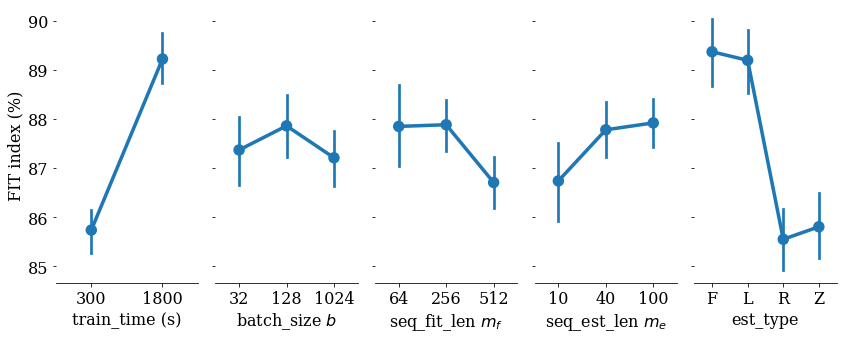

In [13]:
# Full results: main effects
factors = ["max_time", "batch_size", "seq_len", "seq_est_len",  "est_type"]
factor_names = ["train_time (s)",
                "batch_size $b$",
                "seq_fit_len $m_f$",
                "seq_est_len $m_e$",
                "est_type"]

g = sns.PairGrid(df_res, y_vars=response,
                 x_vars=factors,
                 height=6, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

for idx in range(len(factors)):
    g.axes[0, idx].xaxis.set_label_text(factor_names[idx])
    
g.axes[0, 0].yaxis.set_label_text("FIT index (%)")

g.fig.set_size_inches(12,5)
plt.tight_layout()
plt.savefig('figures/PP_fit_vs_factors.eps')

# Figure 2: Effect of training times on the factors

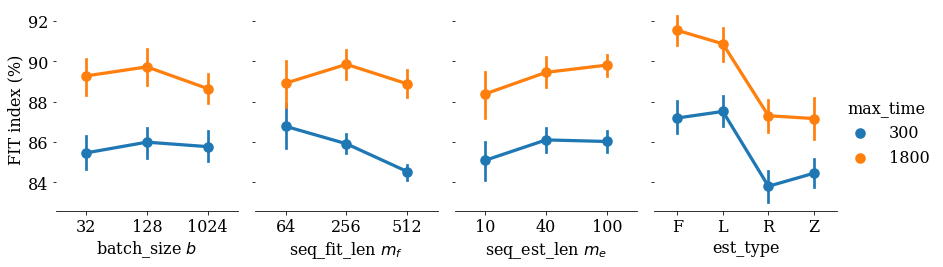

In [14]:
factors = ["batch_size", "seq_len", "seq_est_len",  "est_type"]
factor_names = ["batch_size $b$",
                "seq_fit_len $m_f$",
                "seq_est_len $m_e$",
                "est_type"]
g = sns.PairGrid(df_res, y_vars= response, x_vars= factors, 
                hue = "max_time",
                height = 5, aspect = .5)
g.map(sns.pointplot, scale = 1.2)
sns.despine(fig = g.fig, left = True)

for idx in range(len(factors)):
    g.axes[0, idx].xaxis.set_label_text(factor_names[idx])
g.axes[0, 0].yaxis.set_label_text("FIT index (%)")  


g.fig.set_size_inches(12,4)
plt.tight_layout()
#g.add_legend(title = "train time (s)")
g.add_legend()

#plt.legend(title="train time (s)")
plt.savefig('figures/PP_train_time_effect.eps')


# Figure 3: Effect of short estimator lenght and estimators for max_time

In [15]:
df_short_est = df_res[(df_res["seq_est_len"] == 10) & (df_res["max_time"] == 1800)]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


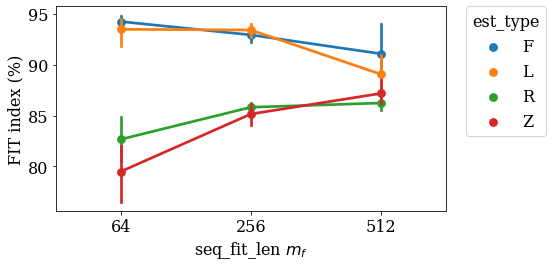

In [16]:
fig, ax = plt.subplots(1,1, figsize=(8, 4))
g = sns.pointplot( x="seq_len", y=response, data=df_short_est, hue="est_type", ax = ax);
g.axes.yaxis.set_label_text("FIT index")
g.axes.xaxis.set_label_text("seq_fit_len $m_f$");
g.legend(title = "estimator type");
g.yaxis.set_label_text("FIT index (%)")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="est_type")
plt.tight_layout()
plt.savefig("figures/PP_short_est_seq_vs_fit_seq.eps")

 # Figure 4: Effect of short fit lenght vs est_len and estimators

In [17]:
df_short_fit = df_res[(df_res["seq_len"] == 64) & (df_res["max_time"] == 1800)]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


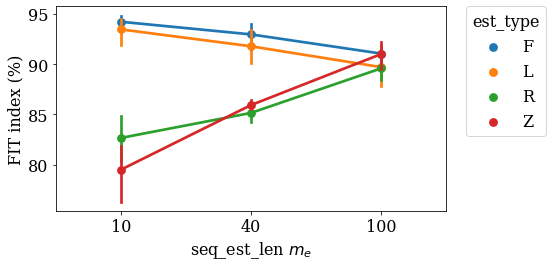

In [18]:
fig, ax = plt.subplots(1,1, figsize=(8, 4))
g = sns.pointplot( x="seq_est_len", y=response, data=df_short_fit, hue="est_type", ax = ax);
g.axes.yaxis.set_label_text("FIT index")
g.axes.xaxis.set_label_text("seq_est_len $m_e$");
g.legend(title = "estimator type");
g.yaxis.set_label_text("FIT index (%)")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="est_type")
plt.tight_layout()
plt.savefig("figures/PP_short_fit_seq_vs_est_seq.eps")

# Figure 4: Effect of long  estimator lenght and estimators types 

In [19]:
df_long_est = df_res[(df_res["seq_est_len"] == 100) & (df_res["max_time"] == 1800)]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


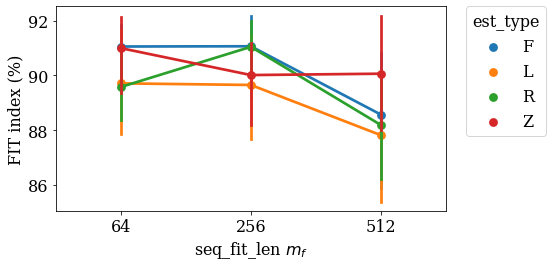

In [20]:
fig, ax = plt.subplots(1,1, figsize=(8, 4))
g = sns.pointplot( x="seq_len", y=response, data=df_long_est, hue="est_type", ax = ax);
g.axes.yaxis.set_label_text("FIT index")
g.axes.xaxis.set_label_text("seq_fit_len $m_f$");
g.legend(title = "estimator type");
g.yaxis.set_label_text("FIT index (%)")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="est_type")
plt.tight_layout()
plt.savefig("figures/PP_long_est_seq_est_type.eps")

# Figure 5: Effect of long fit lenght, varying seq_est_len and estimators types 

In [21]:
df_long_fit = df_res[(df_res["seq_len"] == 512) & (df_res["max_time"] == 1800)]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


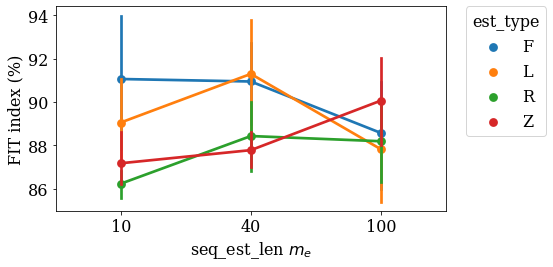

In [22]:
fig, ax = plt.subplots(1,1, figsize=(8, 4))
g = sns.pointplot( x="seq_est_len", y=response, data=df_long_fit, hue="est_type", ax = ax);
g.axes.yaxis.set_label_text("FIT index")
g.axes.xaxis.set_label_text("seq_est_len $m_e$");
g.legend(title = "estimator type");
g.yaxis.set_label_text("FIT index (%)")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="est_type")
plt.tight_layout()
plt.savefig("figures/PP_long_fit_seq_est_type.eps")

In [23]:
df_max_time = df_res[df_res["max_time"] == 1800]
df_max_time

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_type,est_hidden_size,seed,FIT
22,297,0.001,10000,1800,128,256,40,F,30,294,95.256770
41,55,0.001,10000,1800,32,64,10,F,10,425,95.133889
268,35,0.001,10000,1800,1024,512,40,L,10,220,94.948192
59,283,0.001,10000,1800,32,512,10,F,30,19,94.886070
156,271,0.001,10000,1800,32,64,10,F,30,152,94.872825
...,...,...,...,...,...,...,...,...,...,...,...
72,329,0.001,10000,1800,1024,64,10,Z,30,304,81.443520
420,111,0.001,10000,1800,128,64,10,Z,10,81,80.658424
217,379,0.001,10000,1800,32,64,10,R,30,28,77.972755
372,327,0.001,10000,1800,128,64,10,Z,30,369,77.261703


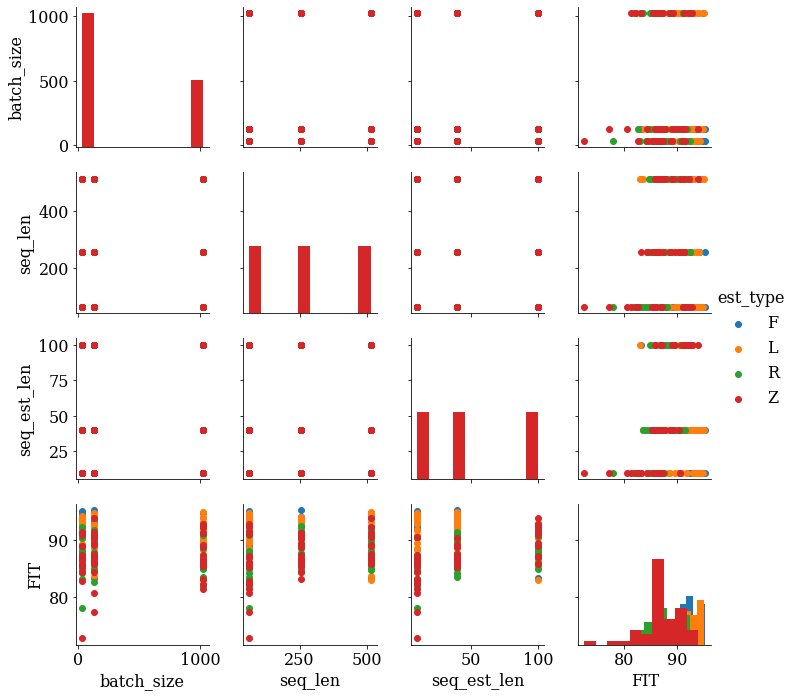

In [24]:
g = sns.PairGrid(data = df_max_time, hue = "est_type", 
                 x_vars = ["batch_size", "seq_len", "seq_est_len", "FIT"], 
                 y_vars = ["batch_size", "seq_len", "seq_est_len", "FIT"])

#g.map_diag(sns.histplot)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

g.add_legend()

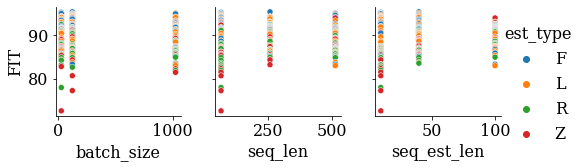

In [28]:
x_vars = ["batch_size", "seq_len", "seq_est_len"]
y_vars = ["FIT"]
g = sns.PairGrid(data=df_max_time, hue="est_type", x_vars=x_vars, y_vars=y_vars)
#g.map_diag(plt.hist)
#g.map_offdiag(sns.kdeplot)
g.map(sns.scatterplot)
#g.map(sns.kdeplot)
g.add_legend()